In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('C:/Users/HOANG NAM/Desktop/bank/bank-full.csv',sep=';')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
nulls = []
for i in df.columns:
    nulls.append(df[i].isnull().sum())
print(nulls)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [3]:
df = df.drop(['duration'],axis=1)

In [4]:
temp_day = []
for i in df['day']:
    if i<8:
        temp_day.append("start")
    elif i>23:
        temp_day.append("end")
    else:
        temp_day.append("middle")

df['day'] = temp_day


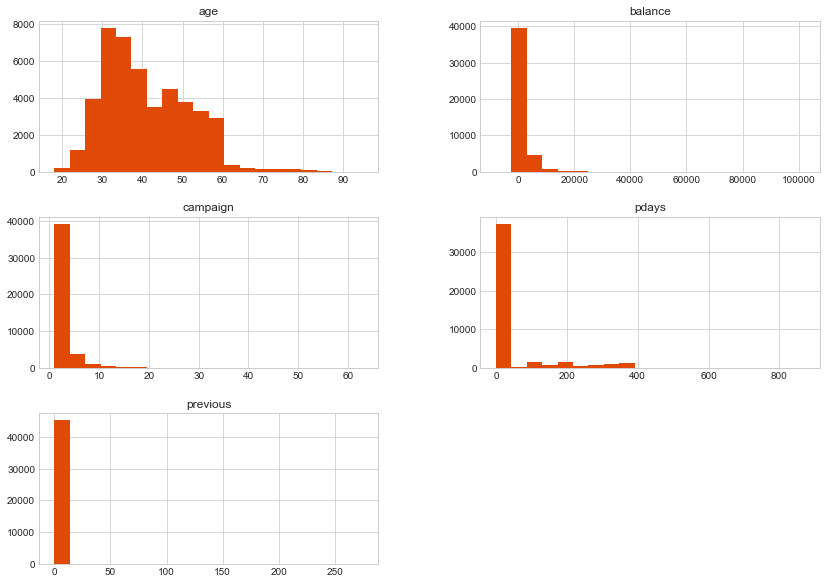

In [6]:
plt.style.use('seaborn-whitegrid')
df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

In [7]:
df.nlargest(20,"campaign")


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
4330,45,management,married,unknown,no,9051,yes,no,unknown,middle,may,63,-1,0,unknown,no
11914,24,technician,single,primary,no,126,yes,no,unknown,middle,jun,58,-1,0,unknown,no
5073,35,technician,married,secondary,no,432,yes,no,unknown,middle,may,55,-1,0,unknown,no
4299,30,management,single,tertiary,no,358,yes,no,unknown,middle,may,51,-1,0,unknown,no
5459,35,blue-collar,married,secondary,no,430,yes,no,unknown,middle,may,50,-1,0,unknown,no
18713,35,blue-collar,married,secondary,no,280,yes,yes,cellular,end,jul,50,-1,0,unknown,no
10697,28,blue-collar,single,secondary,no,235,yes,no,unknown,middle,jun,46,-1,0,unknown,no
18744,49,blue-collar,married,primary,no,371,yes,no,cellular,end,jul,44,-1,0,unknown,no
4275,40,blue-collar,married,secondary,no,-365,yes,no,unknown,middle,may,43,-1,0,unknown,no
13675,51,blue-collar,married,unknown,no,41,yes,no,telephone,middle,jul,43,-1,0,unknown,no


In [7]:
str_columns = []
for i in df.columns:
    if(type(df[i][0])==str):
        str_columns.append(i)


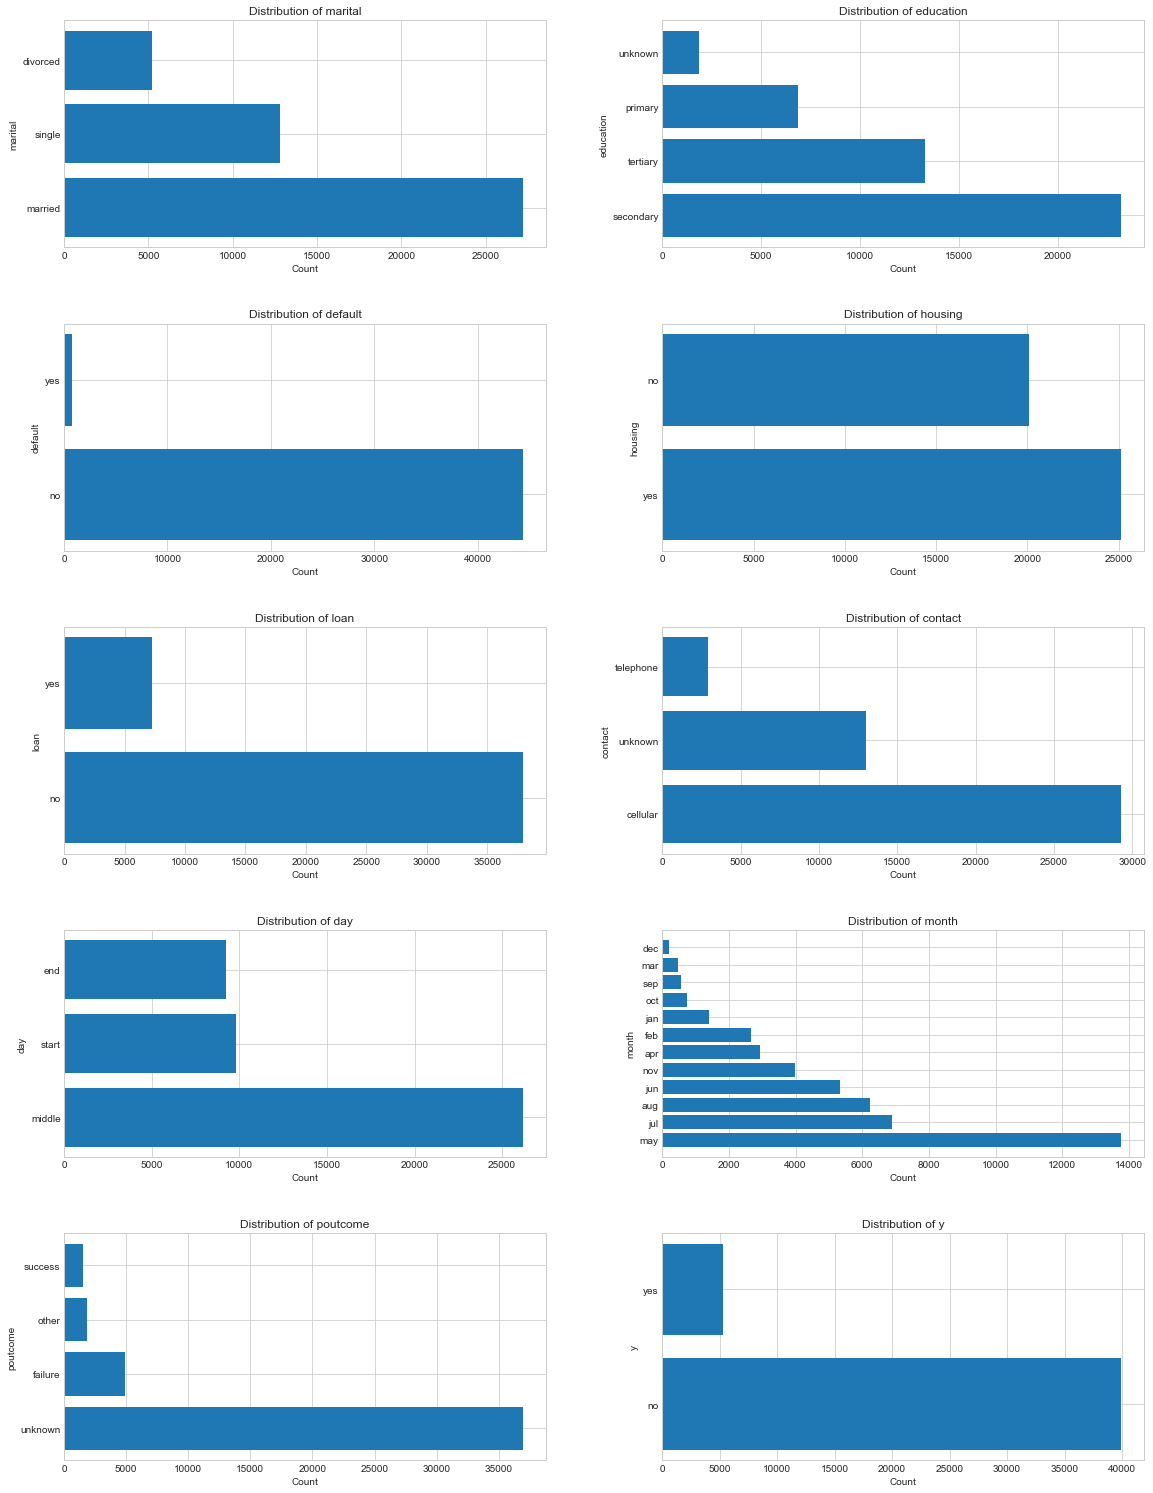

In [10]:
fig, axes = plt.subplots(2,2)
fig.tight_layout(h_pad=2)

bin_list = [1,2,3,4,5,6,7,8,9,10]

for i in range(1,11):
    plt.subplot(5, 2, i)
    n = bin_list[i-1]
    counts = df[str_columns[n]].value_counts()
    plt.barh(y=counts.index, width=counts)
    plt.title('Distribution of '+str_columns[n])
    plt.ylabel(str_columns[n])
    plt.xlabel('Count')

plt.subplots_adjust(left=.25, bottom=5, right=2.75, top=10)




In [5]:
df['default'] = [0 if i == "no" else 1 for i in df['default']]
df['housing'] = [0 if i == "no" else 1 for i in df['housing']]
df['loan']    = [0 if i == "no" else 1 for i in df['loan']]
df['y'] = [0 if i == "no" else 1 for i in df['y']]



In [8]:
for i in ['default','housing','loan','y']:
    str_columns.remove(i)    
print(str_columns)


ValueError: list.remove(x): x not in list

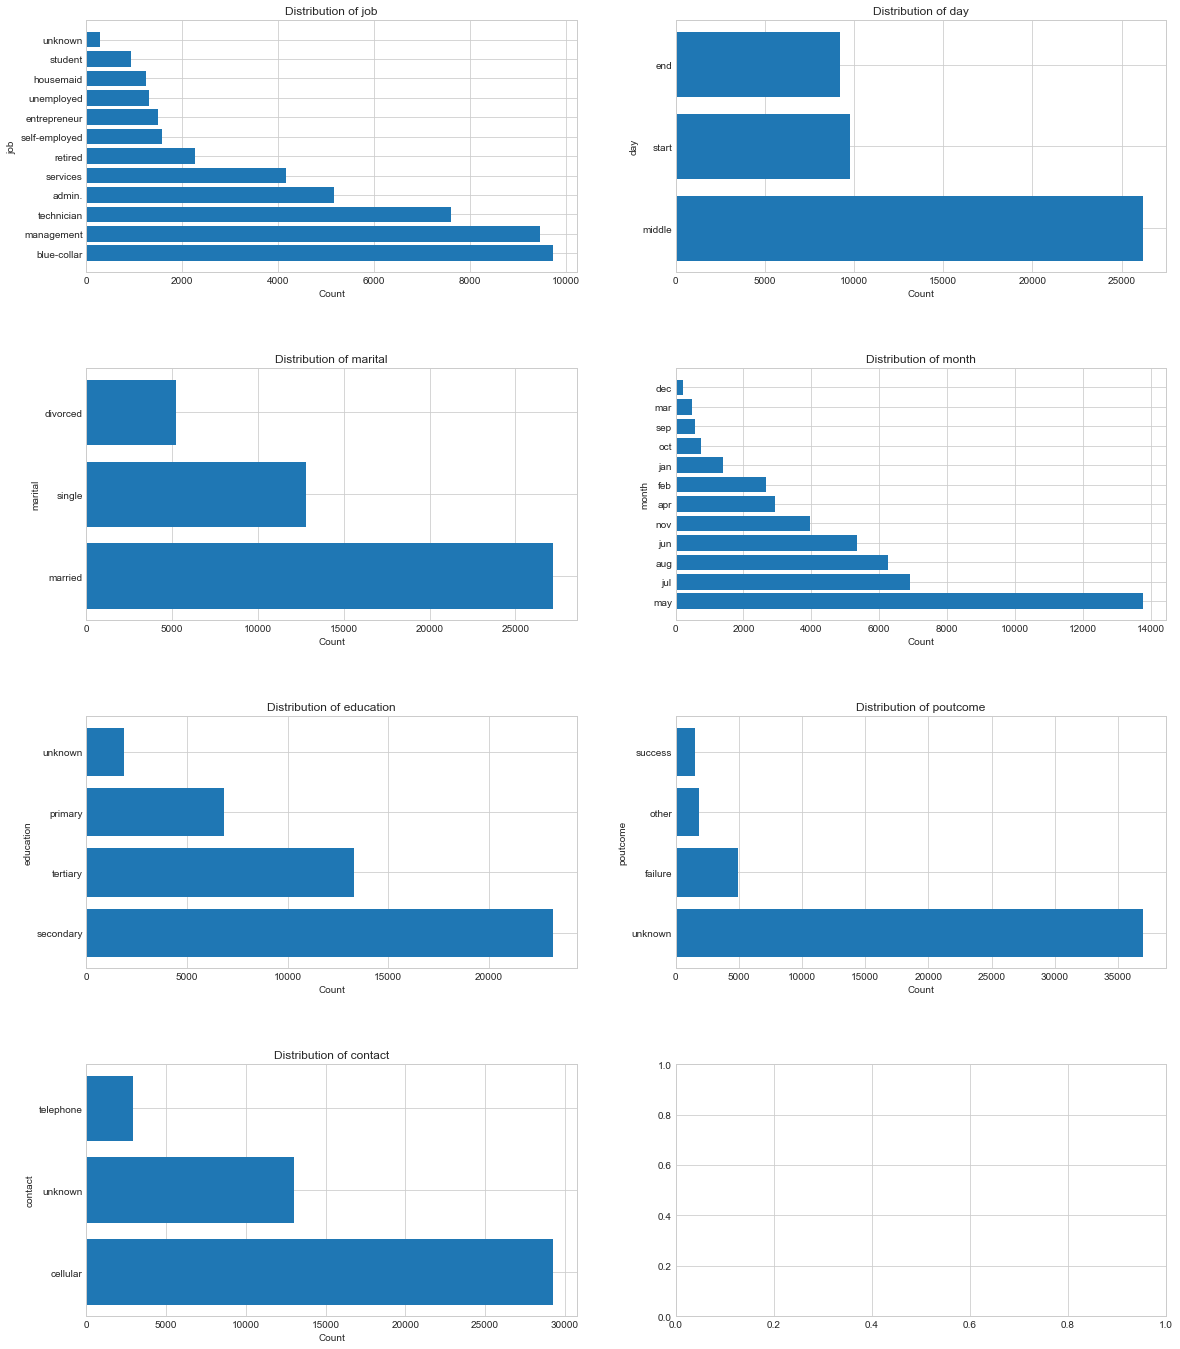

In [13]:
fig, axes = plt.subplots(4,2)
fig.tight_layout(h_pad=.25)

j = 0
k = 0 
for i in range(1,8):
    if k==4:
        k=0
        j=1
    plt.subplot2grid((4, 2), (k,j))
    n = i-1
    counts = df[str_columns[n]].value_counts()
    plt.barh(y=counts.index, width=counts)
    plt.title('Distribution of '+str_columns[n])
    plt.ylabel(str_columns[n])
    plt.xlabel('Count')
    k=k+1
                     
plt.subplots_adjust(left=.25, bottom=.5, right=2.75, top=5)


In [14]:
df = pd.get_dummies(df)
print(len(df.columns))
print(df.columns)

50
Index(['age', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays',
       'previous', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'day_end', 'day_middle', 'day_start', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')


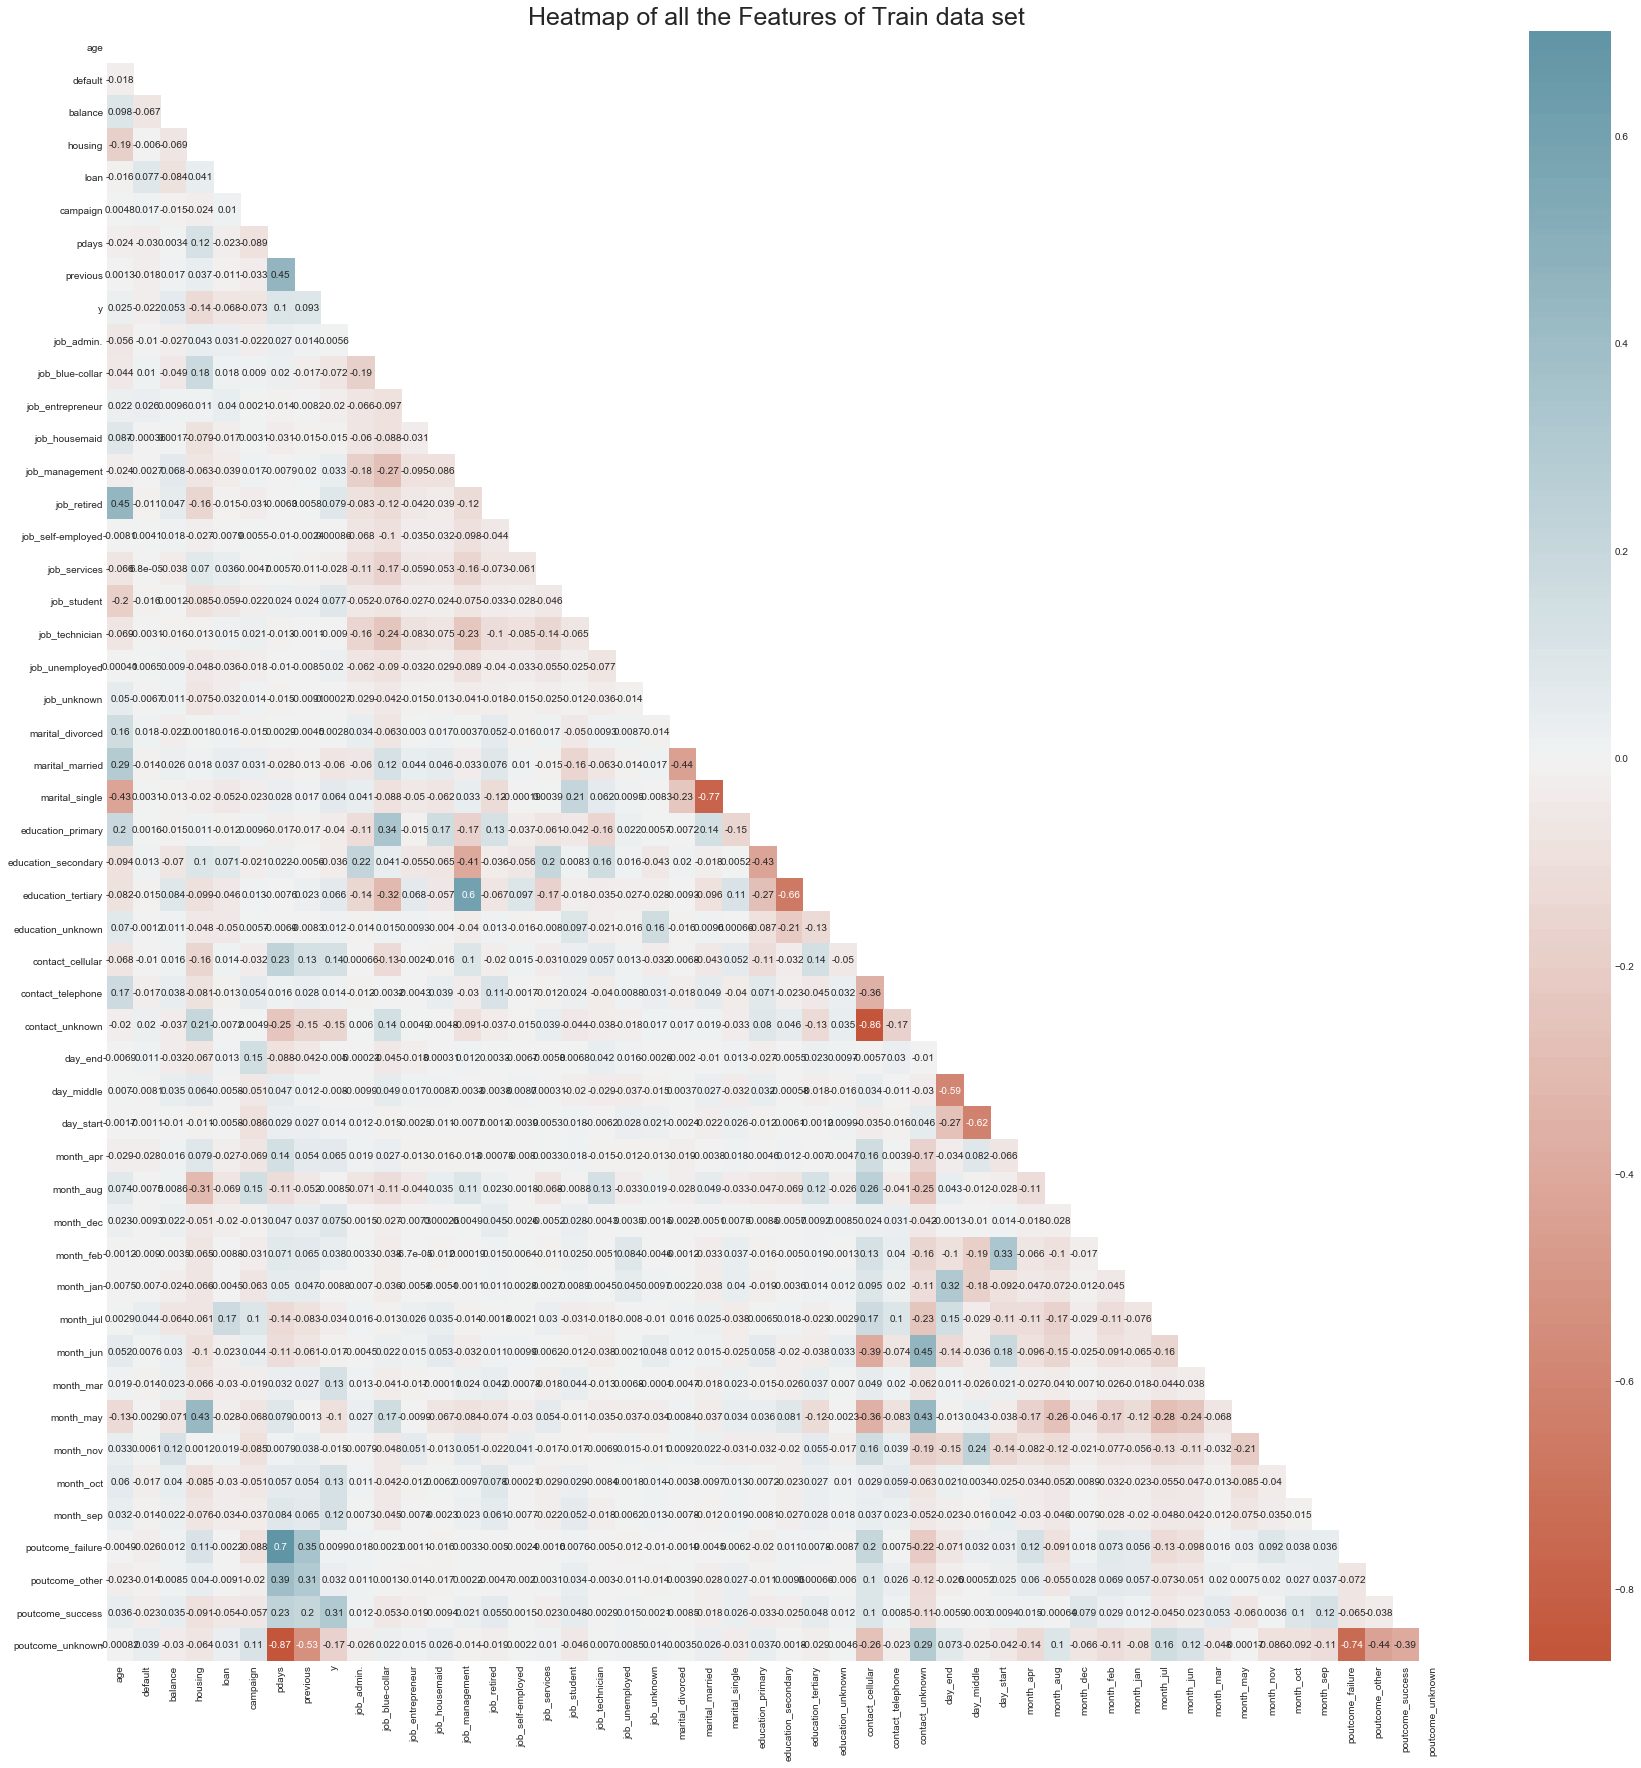

In [15]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,30))
## Plotting heatmap. Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

In [16]:
df.pop("poutcome_unknown")
df.pop("marital_single")
df.pop("day_end")
df.pop("contact_unknown")



0        1
1        1
2        1
3        1
4        1
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: contact_unknown, Length: 45211, dtype: uint8

In [17]:
def Models(models, X_train, X_test, y_train, y_test, title):
    model = models
    model.fit(X_train,y_train)
    
    X, y = Definedata()
    train_matrix = pd.crosstab(y_train, model.predict(X_train), rownames=['Actual'], colnames=['Predicted'])    
    test_matrix = pd.crosstab(y_test, model.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
    matrix = pd.crosstab(y, model.predict(X), rownames=['Actual'], colnames=['Predicted'])
    
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(20, 3))
    #f = plt.figure(figsize=(20, 3))
    
    g1 = sns.heatmap(train_matrix, annot=True, fmt=".1f", cbar=False,ax=ax1)
    g1.set_title(title)
    g1.set_ylabel('Total Deposit = {}'.format(y_train.sum()), fontsize=14, rotation=90)
    g1.set_xlabel('Accuracy score for Training Dataset = {}'.format(accuracy_score(model.predict(X_train), y_train)))
    g2 = sns.heatmap(test_matrix, annot=True, fmt=".1f",cbar=False,ax=ax2)
    g2.set_title(title)
    g2.set_ylabel('Total Deposit = {}'.format(y_test.sum()), fontsize=14, rotation=90)
    g2.set_xlabel('Accuracy score for Testing Dataset = {}'.format(accuracy_score(model.predict(X_test), y_test)))
    g3 = sns.heatmap(matrix, annot=True, fmt=".1f",cbar=False,ax=ax3)
    g3.set_title(title)
    g3.set_ylabel('Total Deposit = {}'.format(y.sum()), fontsize=14, rotation=90)
    g3.set_xlabel('Accuracy score for Total Dataset = {}'.format(accuracy_score(model.predict(X), y)))
    
    plt.show()
    return y, model.predict(X)

In [36]:
import plotly.graph_objects as go

def Featureimportances(models, X_train, y_train):
    model = RandomForestClassifier()
    model.fit(X_train,y_train)
    importances = model.feature_importances_
    features = df.columns
    if len(importances)<len(features): 
        features = df.columns[:len(importances)]
    else:
        importances = model.feature_importances_[:len(features)]
    imp = pd.DataFrame({'Features': features, 'Importance': importances})
    imp = imp.sort_values(by = 'Importance', ascending=False)[:15]
    imp['Sum Importance'] = imp['Importance'].cumsum()
    
    fig = go.Figure()
    fig.add_trace(go.Bar(x=imp.Features,y=imp.Importance, marker=dict(color=list(range(20)), colorscale="Sunsetdark")))

    fig.update_layout(title="Feature Importance",
                                 xaxis_title="Features", yaxis_title="Importance",title_x=0.5, paper_bgcolor="mintcream",
                                 title_font_size=20)
    fig.show()

In [20]:
def Definedata():
    # define dataset
    X=df.drop(columns=['y']).values
    y=df['y'].values
    return X, y

In [22]:
df.dropna(inplace=True)
X=df.drop(columns=['y']).values
y=df['y'].values

In [28]:
from collections import Counter
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

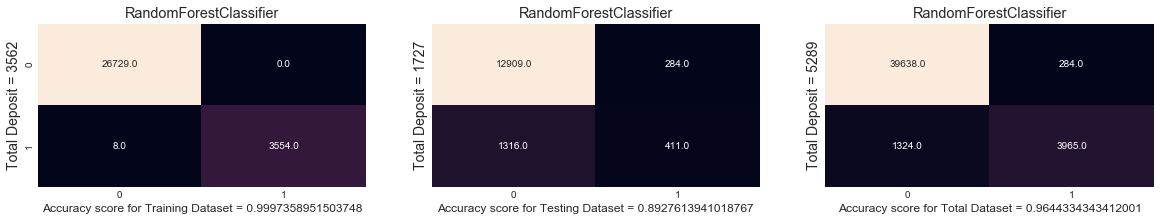

Wall time: 8.66 s


(array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [31]:
title = 'RandomForestClassifier'
%time Models(RandomForestClassifier(),X_train, X_test, y_train, y_test, title)

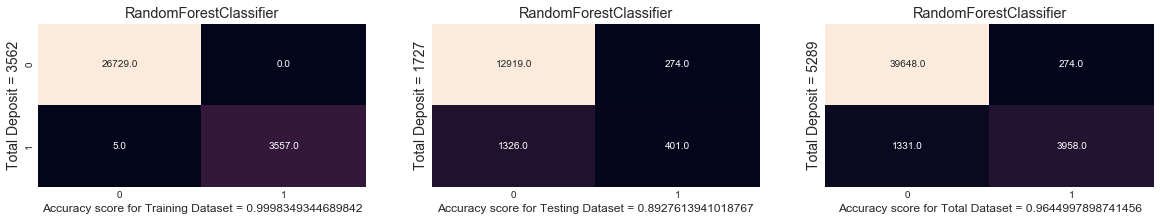

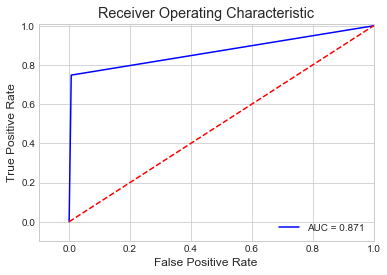

In [32]:
from sklearn.metrics import confusion_matrix,auc,roc_curve

title = 'RandomForestClassifier'
y, ypred =  Models(RandomForestClassifier(),X_train, X_test, y_train, y_test, title)

fpr, tpr, thresholds = roc_curve(y, ypred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1]:
Featureimportances(RandomForestClassifier(), X_train, y_train)

NameError: name 'Featureimportances' is not defined

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,start,may,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,start,may,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,start,may,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,start,may,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,start,may,1,-1,0,unknown,0
